**Task:** Apply the k-means clustering (set k = 2) and spectral clustering algorithms to the two-dimensional dataset stored in `Assignment5Dataset.csv'. Try using di
fferent values of  while preparing the  neighbourhood similarity graph for spectral clustering.
Visualize the clusters obtained using each of the methods.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("Assignment5Dataset.csv")
n=data.shape[0]
clusters=2
print(data.shape)
print(data.describe())

(1500, 2)
                X1           X2
count  1500.000000  1500.000000
mean      0.498501     0.251743
std       0.868054     0.496365
min      -1.112339    -0.628397
25%      -0.036013    -0.202562
50%       0.497101     0.246369
75%       1.037322     0.718451
max       2.095098     1.119580


In [ ]:
data.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


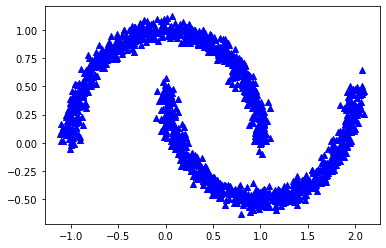

In [ ]:
plt.scatter(data["X1"],data["X2"],c="blue",marker="^")

In [ ]:
def returnColumn(matrix, i):
    return [row[i] for row in matrix]

### **K-Means Clustering**

In [ ]:
def assign(mean1,mean2,A):
  for index,row in data.iterrows():
    temp=np.array([row['X1'],row['X2']])
    dist_to_u1=np.linalg.norm(temp-mean1)
    dist_to_u2=np.linalg.norm(temp-mean2)
    if(dist_to_u1>dist_to_u2):
      A[index][1]=1
    else:
      A[index][0]=1  
  return A

In [ ]:
def plotGraph(K1,K2,mean1,mean2):
    plt.scatter(returnColumn(K1,0),returnColumn(K1,1),c='blue')
    plt.plot(mean1[0],mean1[1],c='black',marker='x',markersize=10,linewidth=3)
    plt.scatter(returnColumn(K2,0),returnColumn(K2,1),c='red')
    plt.plot(mean2[0],mean2[1],c='black',marker='x',markersize=10,linewidth=3)
    plt.show()

In [ ]:
def k_means_cluster(mean1,mean2,K1,K2):
  i=0
  A= np.empty(shape=(n,clusters))
  A.fill(0)
  while True:
    A_old=np.copy(A)
    assign(mean1,mean2,A)
    if(np.array_equal(A_old,A)):
      print("Iterations Took:",i)
      break
    k1=[]
    k2=[]
    for index,row in data.iterrows():
      row=np.array([row['X1'],row['X2']])
      if(A[index][0]==1):
        k1.append(row)
      else:
        k2.append(row)
    K1=np.array(k1)
    K2=np.array(k2)
    plotGraph(K1,K2,mean1,mean2)
    mean1=np.mean(K1, axis=0)
    mean2=np.mean(K2, axis=0)
    i+=1
  return K1,K2

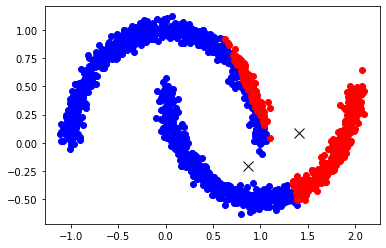

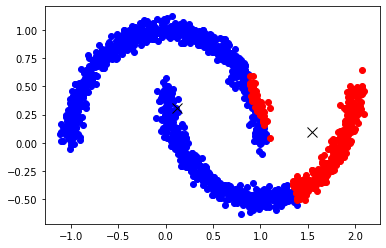

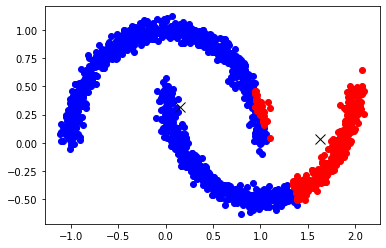

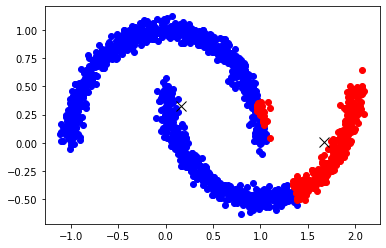

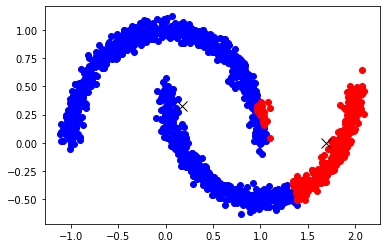

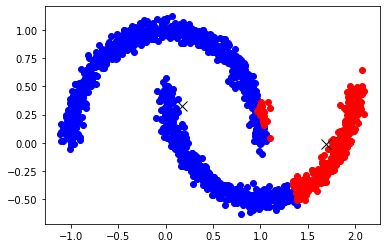

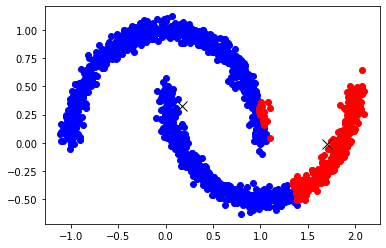

Iterations Took: 7
(1180, 2) (320, 2)


In [ ]:
import random
maxCol = data.max()
minCol = data.min()
mean1=np.array([random.uniform(minCol[0],maxCol[0]),random.uniform(minCol[1],maxCol[1])])
mean2=np.array([random.uniform(minCol[0],maxCol[0]),random.uniform(minCol[1],maxCol[1])])
K1=np.array([])
K2=np.array([])
K1,K2=k_means_cluster(mean1,mean2,K1,K2)
print(K1.shape,K2.shape)

## **Spectral Clustering**

In [ ]:
#epsilon neighborhood graph
epsilon=[0.05,0.1,0.5,0.9]
W=np.empty(shape=(n,n))
W.fill(0)

def makeGraph(epsilon):
  for i,row1 in data.iterrows():
    for j,row2 in data.iterrows():
      dist=np.linalg.norm(row1-row2)
      if(j==i or dist>epsilon):
        W[i][j]=0
      else:
        W[i][j]=1

def getEigenVector(L):
  eigenValues,eigenVectors= np.linalg.eig(L)
  idx = eigenValues.argsort()
  q = eigenVectors[:,1]
  return q

def assignCluster(K1,K2,q):
  for i,row in data.iterrows():
    if(q[i]<=0):
      K1.append(row)
    else:
      K2.append(row)  
  return K1,K2

def plotGraphEpsilon(K1,K2,e):
  plt.scatter(returnColumn(K1,0),returnColumn(K1,1),c='blue')
  plt.scatter(returnColumn(K2,0),returnColumn(K2,1),c='red')
  txt="Epsilon= {eps}"
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title(txt.format(eps=e))
  plt.show()





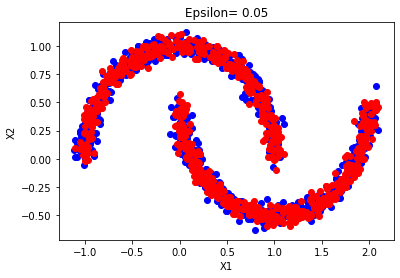

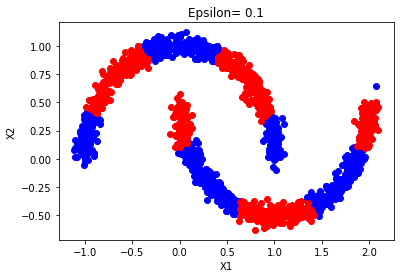

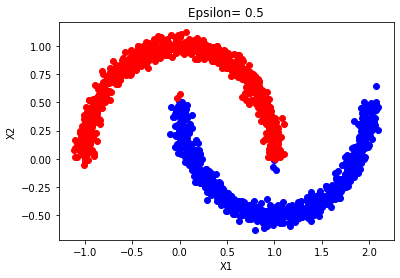

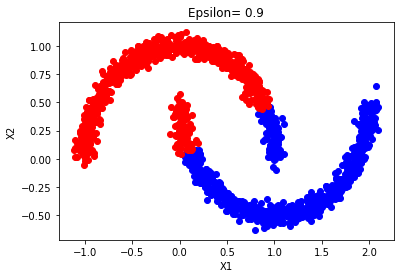

In [ ]:

# {0.05:{K1:[],K2:[]},0.1:{K1:[],K2:[]}....}

for e in epsilon:
  makeGraph(e)
  D=np.diag(np.sum(W,axis=1))
  L=D-W
  K1=[]
  K2=[]
  q=getEigenVector(L)   # Eigen Vector corresponding to 2nd smallest eigen Value
  K1,K2=assignCluster(K1,K2,q)
  plotGraphEpsilon(K1,K2,e)
  


  



